In [1]:
from qiskit import *
import matplotlib.pyplot as plt

C:\Users\nico_\Anaconda3\lib\site-packages\qiskit\__init__.py:66: DeprecationWarning: Using Qiskit with Python 3.6 is deprecated as of qiskit-terra 0.17.0. Support for running Qiskit with Python 3.6 will be removed in qiskit-terra 0.20.0.
  DeprecationWarning,


In [2]:
#3 qbits grover algorithm with oracle w=|1,1,1> as desired state

In [3]:
qr = QuantumRegister(4)

In [4]:
cr = ClassicalRegister(3)

In [5]:
qc = QuantumCircuit(qr,cr)

In [6]:
qc.x(qr[3])

In [7]:
for q in range(3):
    qc.barrier(qr[q])
    qc.h(qr[q])

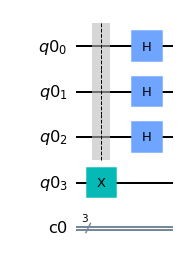

In [8]:
qc.draw(output='mpl')

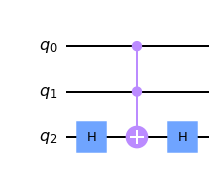

In [9]:
#custom ccz gate to implement oracle for w = |1,1,1>
sub_circuit = QuantumCircuit(3, name='ccz')
sub_circuit.h(2)
sub_circuit.ccx(0,1,2)
sub_circuit.h(2)
sub_circuit.draw(output='mpl')

In [10]:
ccz = sub_circuit.to_instruction()

In [11]:
qc.append(ccz,[qr[0],qr[1],qr[2]])

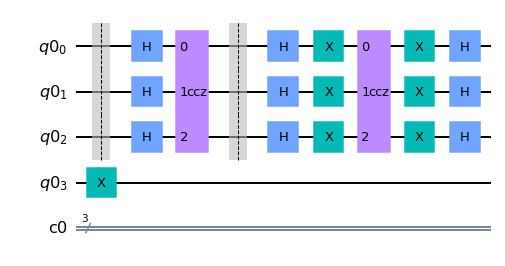

In [12]:
#one grover iterate is enough
for q in range(3):
    qc.barrier(qr[q])
    qc.h(qr[q])
    qc.x(qr[q])
    
qc.append(ccz,[qr[0],qr[1],qr[2]])

for q in range(3):
    qc.x(qr[q])
    qc.h(qr[q])
    
#the diffuser will always be H^nX^n(MCZ)X^nH^n fow all w winner string, 
#the only thing that change is the oracle (MCZ is multi-controlled Z)
qc.draw(output='mpl')

In [13]:
qc.measure_all()

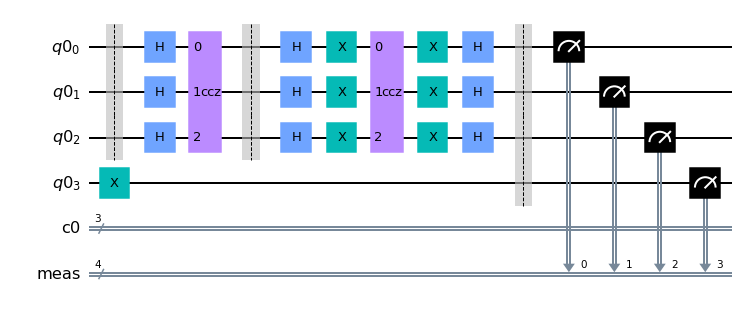

In [14]:
qc.draw(output='mpl')

In [15]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc,backend=simulator).result()

In [16]:
from qiskit.tools.visualization import plot_histogram

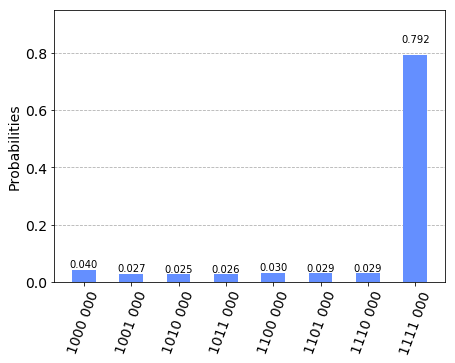

In [17]:
plot_histogram(result.get_counts(qc))